# Exploratory Data Analysis (EDA)

**Goal:**  
Understand the synthetic credit portfolio dataset, identify distributions, outliers, and relationships between variables.  
This helps us prepare for modeling PD, LGD, and EAD.

**Dataset location:**  
`data/input_raw/credit_portfolio.csv`

**Key questions:**
- What are the distributions of Age, Income, CreditScore, LoanAmount?
- How do PD, LGD, EAD vary across borrowers?
- Are there any outliers or anomalies?


In [10]:
import pandas as pd
from pathlib import Path

# Absolute path to project folder
project_path = Path("/home/skumar/Desktop/credit-risk-analytics")
csv_file = project_path / "data/input_raw/credit_portfolio.csv"

# Load the dataset
data = pd.read_csv(csv_file)

print("✅ Data loaded successfully")
print("Shape of dataset:", data.shape)
data.head()


✅ Data loaded successfully
Shape of dataset: (1000, 10)


,BorrowerID,Age,Income,CreditScore,LoanAmount,InterestRate,TermMonths,PD,LGD,EAD
0,1,59,24324,766,136717,0.0837,24,0.0599,0.3606,121789.20
1,2,49,96323,713,167002,0.1396,12,0.0442,0.3472,150060.00
2,3,35,29111,754,266691,0.0972,48,0.0248,0.1261,233692.63
3,4,63,58110,532,86835,0.1512,12,0.1105,0.1895,72685.55
4,5,28,36389,523,127232,0.0639,60,0.1209,0.1278,110827.12


## Basic Statistics

We will check:
- Summary statistics for numerical columns
- Mean, median, min, max, std
- Identify any extreme values


In [11]:
# Summary statistics
summary = data.describe()
summary


,BorrowerID,Age,Income,CreditScore,LoanAmount,InterestRate,TermMonths,PD,LGD,EAD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,45.379000,85179.054000,576.856000,251274.327000,0.114322,36.588000,0.088390,0.289231,225583.198760
std,288.819436,14.122138,38259.440036,158.399494,141247.794531,0.049088,16.629937,0.057453,0.166288,127550.189224
min,1.000000,21.000000,20060.000000,300.000000,5138.000000,0.030000,12.000000,0.000900,0.009600,4817.560000
25%,250.750000,33.000000,52868.000000,441.750000,135495.750000,0.071850,24.000000,0.043975,0.162175,120217.287500
50%,500.500000,46.000000,84772.000000,577.500000,244306.500000,0.114700,36.000000,0.077400,0.268800,219741.030000
75%,750.250000,57.000000,117674.250000,713.000000,367124.750000,0.157200,48.000000,0.119400,0.391750,328691.322500
max,1000.000000,69.000000,149972.000000,849.000000,499178.000000,0.199900,60.000000,0.433200,0.900600,493839.130000


## Visualizing Distributions

We will plot histograms and boxplots to see distributions and potential outliers.

Variables to check:
- Age, Income, CreditScore, LoanAmount
- PD, LGD, EAD


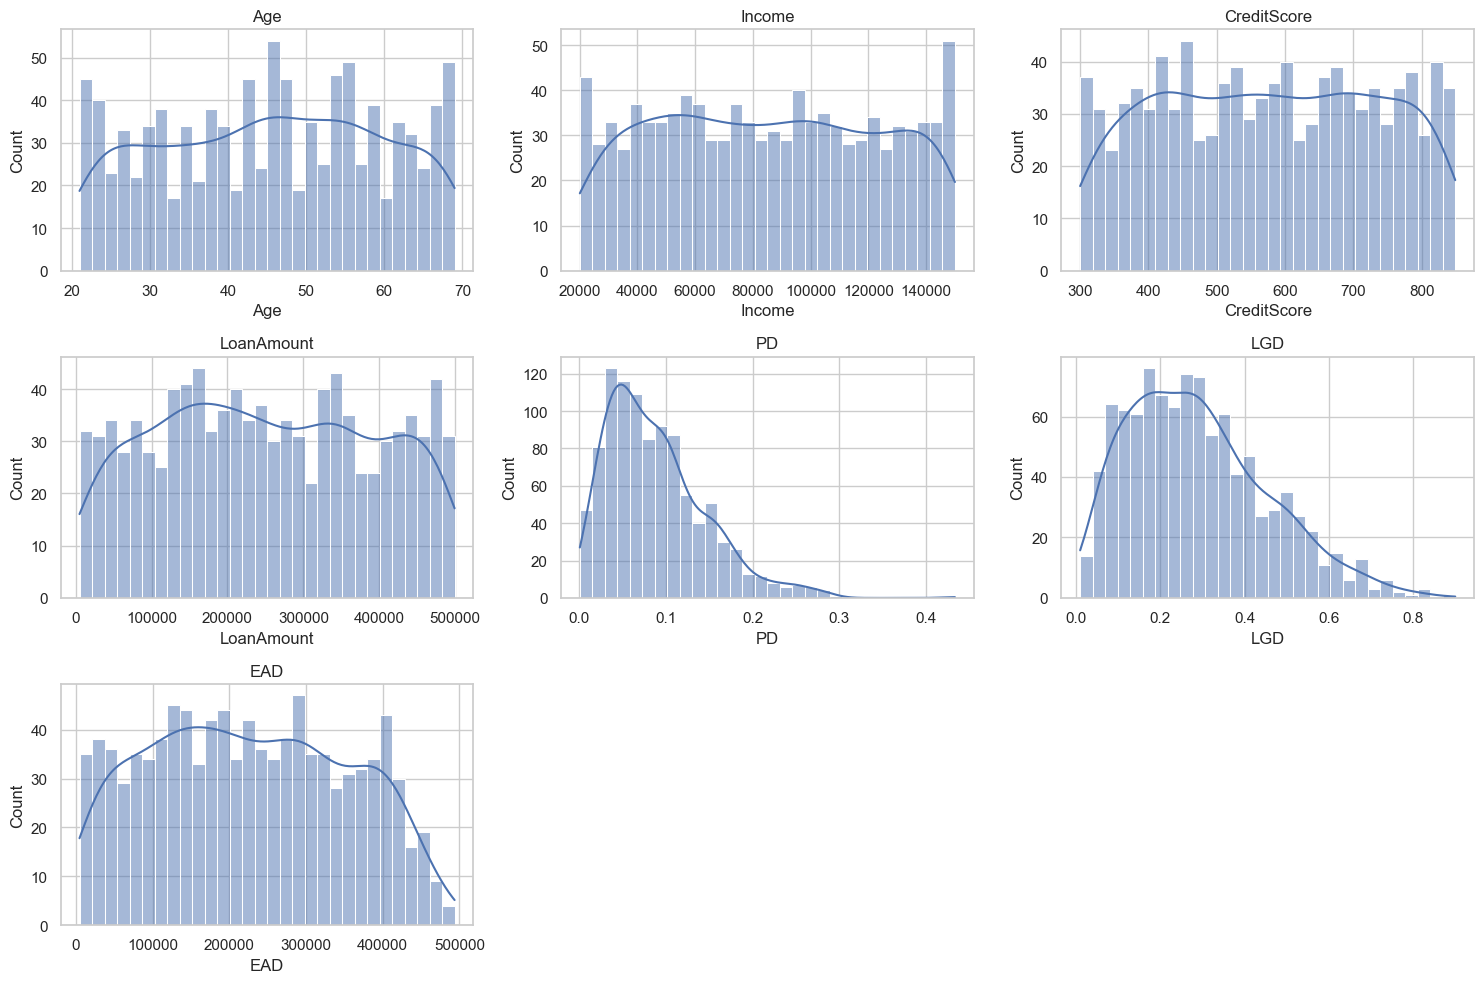

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# List of columns to plot
cols_to_plot = ["Age", "Income", "CreditScore", "LoanAmount", "PD", "LGD", "EAD"]

# Plot histograms
plt.figure(figsize=(15,10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


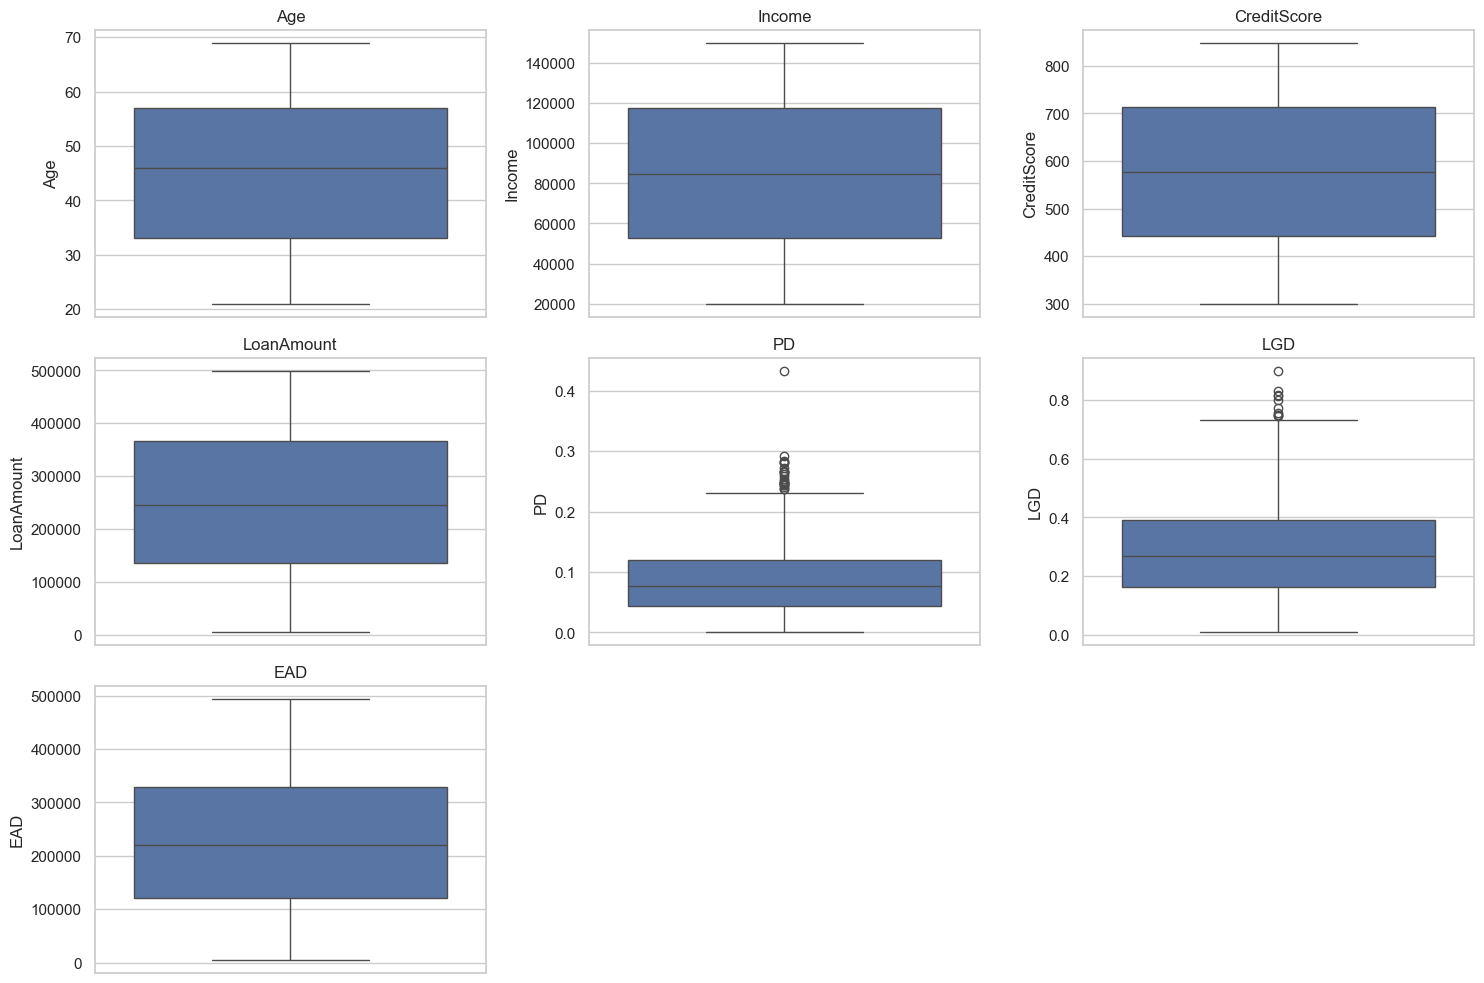

In [13]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Correlation Analysis

- Check correlation between numerical variables
- Understand relationships between borrower features and risk metrics
- Useful for feature selection in modeling


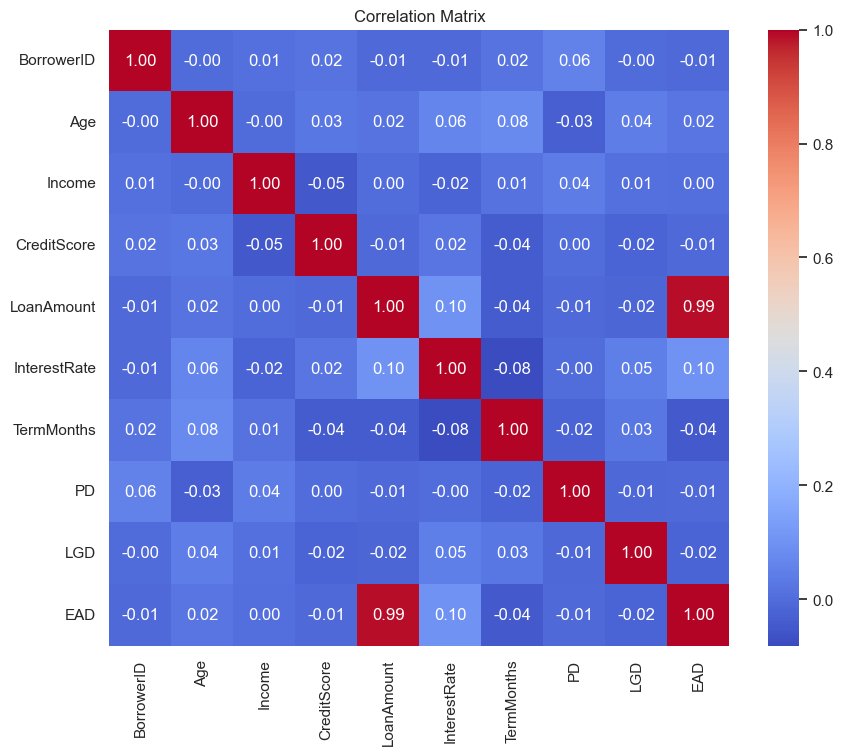

In [14]:
plt.figure(figsize=(10,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Summary

- Visualized distributions of Age, Income, CreditScore, LoanAmount, PD, LGD, EAD
- Identified potential outliers using boxplots
- Correlation heatmap shows relationships between borrower features and risk metrics
- Dataset is now ready for ** Build PD, LGD, and EAD models**
